# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas


##### 1.a) Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

In [30]:
# Importando as bibliotecas necessárias
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [31]:
# Carregando a base de dados
df = sns.load_dataset('tips')
# Criando a variável net_bill
df['net_bill'] = df['total_bill'] - df['tip']


In [32]:
# Realizando a regressão
model = smf.ols(formula='tip ~ net_bill', data=df)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           5.02e-23
Time:                        16:12:26   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

##### 1. b) Reproduza também o gráfico de dispersão dessas duas variáveis.

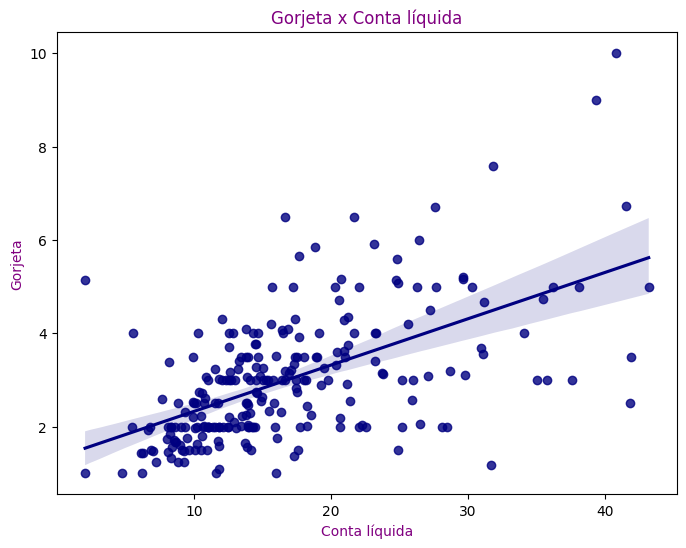

In [33]:
# Criando o gráfico de dispersão com linha de regressão
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=df, x='net_bill', y='tip', ax=ax, color = 'navy')
ax.set_xlabel('Conta líquida', color= 'purple')
ax.set_ylabel('Gorjeta', color='purple')
plt.title('Gorjeta x Conta líquida', color = 'purple')
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [34]:
# Criando a variável tip_pct
df['tip_pct'] = df['tip'] / df['total_bill'] * 100


In [35]:
# Realizando a regressão
model = smf.ols(formula='tip_pct ~ net_bill', data=df)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.21e-12
Time:                        16:12:36   Log-Likelihood:                -761.73
No. Observations:                 244   AIC:                             1527.
Df Residuals:                     242   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6233      0.819     26.401      0.0

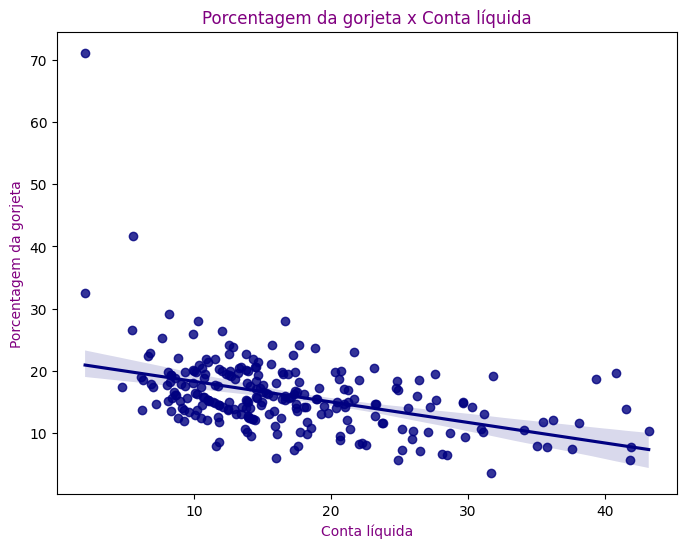

In [36]:
# Criando o gráfico de dispersão com linha de regressão
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=df, x='net_bill', y='tip_pct', ax=ax, color = 'navy')
ax.set_xlabel('Conta líquida', color = 'purple')
ax.set_ylabel('Porcentagem da gorjeta', color = 'purple')
plt.title('Porcentagem da gorjeta x Conta líquida', color = 'purple')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Visualizando o gráfico fica notório que o 'tip ~ net_bill' é um gráfico crescente e o
'tip_pct ~ net_bill' é um gráfico decrescente.



> Ambos os gráficos mostram que **a maioria das observações está concentrada nos valores mais baixos da conta líquida**, indicando que a quantidade de dados diminui à medida que o valor da conta aumenta.

> No primeiro gráfico, que mostra a relação entre `net_bill` e `tip`, observamos uma correlação positiva. Isso significa que à medida que os valores de `net_bill` aumentam, os valores de `tip` também tendem a aumentar. Isso é consistente com a prática comum de dar gorjetas como uma porcentagem do valor total da conta.

> No entanto, o segundo gráfico, que mostra a relação entre `net_bill` e `tip_pct`, apresenta uma correlação inversa ou negativa. Isso sugere que à medida que `net_bill` aumenta, `tip_pct` tende a diminuir. Isso pode ser explicado pelo fato de que, *embora as pessoas tendam a dar gorjetas maiores para contas maiores *(como visto no primeiro gráfico), *a porcentagem da gorjeta em relação ao valor total da conta pode diminuir*.

> Em termos de ajuste do modelo, ambos os modelos apresentam um baixo coeficiente de determinação (R²). No entanto, *o primeiro modelo tem um melhor ajuste aos dados do que o segundo modelo*, indicando que ele pode ser mais útil para prever os valores de `tip` com base em `net_bill`.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:


##### 4.1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)

In [41]:
# Obtendo o valor predito para tip_pct
df['pred_tip_pct'] = results.fittedvalues
df['pred_tip_pct']

0      16.346938
1      18.757296
2      15.841753
3      14.897421
4      14.696007
         ...    
239    13.992711
240    13.309225
241    14.798365
242    16.317221
243    16.412975
Name: pred_tip_pct, Length: 244, dtype: float64

##### 4.2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```

In [42]:
# Obtendo o valor predito para tip como tip_pct * net_bill
df['pred_tip'] = df['pred_tip_pct'] / 100 * df['net_bill']
df['pred_tip']

0      2.612241
1      1.628133
2      2.773891
3      3.034605
4      3.083222
         ...   
239    3.233715
240    3.351263
241    3.058822
242    2.622177
243    2.589967
Name: pred_tip, Length: 244, dtype: float64

##### 4.3. calcule o $R^2$ do modelo para ```tip```


In [40]:
# Calculando o R² do modelo para tip
r2 = r2_score(df['tip'], df['pred_tip'])
print(f'O R² do modelo para tip é {r2:.2f}')


O R² do modelo para tip é 0.15


##### 4.4. compare esse $R^2$ com o do item 1

In [48]:
# Calculando o R² do modelo reg_tip
model_tip = smf.ols(formula='tip ~ net_bill', data=df)
results_tip = model_tip.fit()
print(f'Coeficiente de determinação (R²) do modelo `reg_tip`: {results_tip.rsquared: .2f}')


# Calculando o R² do modelo reg_tip_pct
model_tip_pct = smf.ols(formula='tip_pct ~ net_bill', data=df)
results_tip_pct = model_tip_pct.fit()
print(f'Coeficiente de determinação (R²) do modelo `reg_tip_pct`:  {results_tip_pct.rsquared: .2f}')


Coeficiente de determinação (R²) do modelo `reg_tip`:  0.33
Coeficiente de determinação (R²) do modelo `reg_tip_pct`:   0.19
